<a href="https://colab.research.google.com/github/andrewwells991/mds_thesis/blob/main/rf_pixel_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
#Labeled dataset
url = 'https://raw.githubusercontent.com/andrewwells991/mds_thesis/main/combined_pixel_ob/proj_2_5_aug_21_combined_pixel_ob.csv'
df = pd.read_csv(url)

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df

,B2,B3,B4,B8,B11,B12,row,geometry,index_right,latitude,longitude,area_in_meters,confidence,full_plus_code,building
0,1446.0,1347.0,1404.0,1737.0,2294.0,1928.0,19,POINT (35.256925115217896 -14.473707235595487),2676.0,-14.473733,35.256922,155.0028,0.8333,5GQQG7G4+GQ3P,1
1,1455.0,1275.0,1271.0,1852.0,2496.0,1950.0,41,POINT (35.258964982764375 -14.473687648132453),1524.0,-14.473691,35.258979,43.9090,0.8290,5GQQG7G5+GHH7,1
2,1229.0,1113.0,1205.0,1682.0,2676.0,2289.0,60,POINT (35.26072668409148 -14.473670717474617),2687.0,-14.473665,35.260744,41.6687,0.6128,5GQQG7G6+G7Q9,1
3,1356.0,1312.0,1290.0,1666.0,2468.0,2102.0,62,POINT (35.26091212620356 -14.47366893453384),857.0,-14.473693,35.260898,104.8771,0.8597,5GQQG7G6+G9C8,1
4,1175.0,1017.0,963.0,1245.0,2403.0,2161.0,64,POINT (35.26109756829033 -14.47366715144711),1179.0,-14.473709,35.261074,141.4433,0.8533,5GQQG7G6+GC8M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,1052.0,894.0,885.0,1635.0,1965.0,1596.0,19932,NaN,NaN,-14.482585,35.273243,NaN,NaN,NaN,0
19933,1227.0,1006.0,1022.0,1704.0,2367.0,1865.0,19934,NaN,NaN,-14.482584,35.273429,NaN,NaN,NaN,0
19934,1150.0,1043.0,1049.0,1944.0,2367.0,1865.0,19935,NaN,NaN,-14.482583,35.273521,NaN,NaN,NaN,0
19935,1143.0,1030.0,1101.0,1949.0,2591.0,1914.0,19936,NaN,NaN,-14.482582,35.273614,NaN,NaN,NaN,0


In [7]:
feature_names = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
label = "building"

In [8]:
X = df[feature_names]
y = df[label]

In [9]:
sum(y)

2896

In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
#Train model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
#Evaliuate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3407
           1       0.53      0.19      0.28       581

    accuracy                           0.86      3988
   macro avg       0.70      0.58      0.60      3988
weighted avg       0.83      0.86      0.83      3988



In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8575727181544633


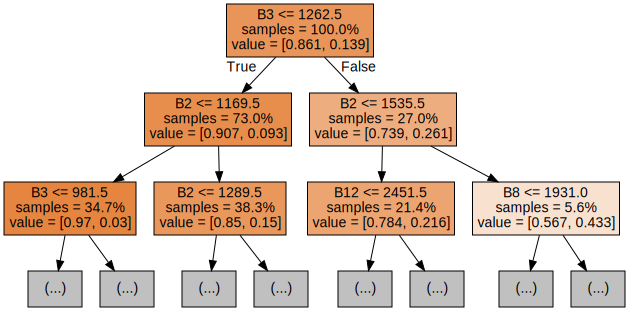

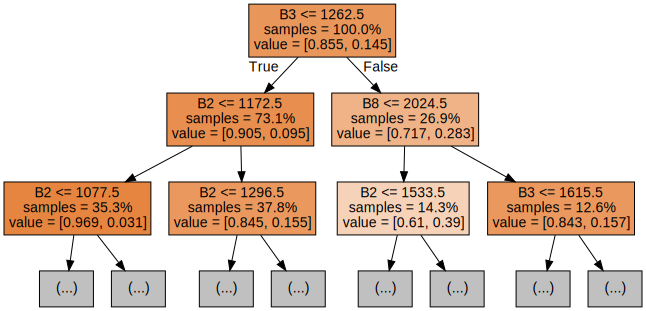

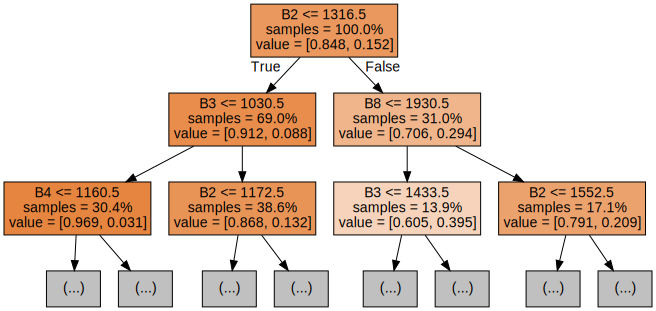

In [14]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

The colors represent the majority class of each node (box, with red indicating majority 0 (no building) and blue indicating majority 1 (building). 

In [15]:
#Hyperparameter check

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ff9f64f6370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ff9f64d1a60>})

In [16]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

In [17]:
# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", rand_search.best_params_)
print("Best score: ", rand_search.best_score_)

Best hyperparameters:  {'max_depth': 10, 'n_estimators': 429}
Best score:  0.8598656235039925


In [18]:
rf_2 = RandomForestClassifier(n_estimators = 368, max_depth = 8)

rf_2.fit(X_train, y_train)

y_pred_2 = rf_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_2)
print("Accuracy:", accuracy)

Accuracy: 0.8608324974924775


In [ ]:
#Evaliuate optimal hyperparameters
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      3411
           1       0.66      0.12      0.20       577

    accuracy                           0.86      3988
   macro avg       0.77      0.55      0.56      3988
weighted avg       0.84      0.86      0.82      3988



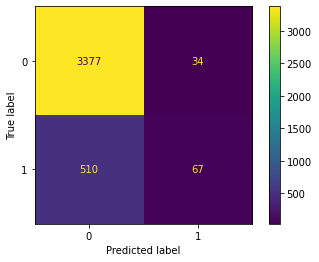

In [ ]:
# Generate predictions with the best model
y_pred_2 = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_2)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

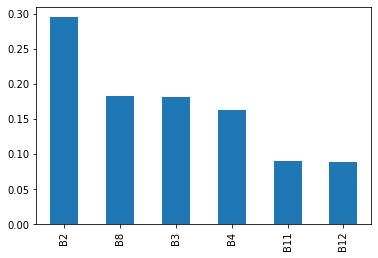

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

Running alorithm on 2020

In [ ]:
data_20 = "/content/drive/MyDrive/mds_thesis/pixel_data/proj_2_5_aug_20_pixel.csv"
df_20 = pd.read_csv(data_20)

In [ ]:
df_20 = df_20.drop(columns=['latitude', 'longitude'])

In [ ]:
# get prediction for new input
y_pred = rf_2.predict(df_20)

In [ ]:
sum(y_pred)

630